# **1. Introduction to Naive Bayes algorithm** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)


In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features.  Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.


Naïve Bayes models are also known as `simple Bayes` or `independent Bayes`. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.


# **2. Naive Bayes algorithm intuition** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)


Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the **Maximum A Posteriori (MAP)**. 

The **MAP for a hypothesis with 2 events A and B is**

**MAP (A)**

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))


Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.


Naïve Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature. 


In real world datasets, we test a hypothesis given multiple evidence on features. So, the calculations become quite complicated. To simplify the work, the feature independence approach is used to uncouple multiple evidence and treat each as an independent one.


# **3. Types of Naive Bayes algorithm** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)


There are 3 types of Naïve Bayes algorithm. The 3 types are listed below:-

  1. Gaussian Naïve Bayes

  2. Multinomial Naïve Bayes

  3. Bernoulli Naïve Bayes

These 3 types of algorithm are explained below.


## **Gaussian Naïve Bayes algorithm**


When we have continuous attribute values, we made an assumption that the values associated with each class are distributed according to Gaussian or Normal distribution. For example, suppose the training data contains a continuous attribute x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let µi be the mean of the values and let σi be the variance of the values associated with the ith class. Suppose we have some observation value xi . Then, the probability distribution of xi given a class can be computed by the following equation –


![Gaussian Naive Bayes algorithm](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEWCcq1XtC1Yw20KWSHn2axYa7eY-a0T1TGtdVn5PvOpv9wW3FeA&s)

## **Multinomial Naïve Bayes algorithm**

With a Multinomial Naïve Bayes model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1, . . . ,pn) where pi is the probability that event i occurs. Multinomial Naïve Bayes algorithm is preferred to use on data that is multinomially distributed. It is one of the standard algorithms which is used in text categorization classification.

## **Bernoulli Naïve Bayes algorithm**

In the multivariate Bernoulli event model, features are independent boolean variables (binary variables) describing inputs. Just like the multinomial model, this model is also popular for document classification tasks where binary term occurrence features are used rather than term frequencies.

# **4. Applications of Naive Bayes algorithm** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)



Naïve Bayes is one of the most straightforward and fast classification algorithm. It is very well suited for large volume of data. It is successfully used in various applications such as :

1. Spam filtering
2. Text classification
3. Sentiment analysis
4. Recommender systems

It uses Bayes theorem of probability for prediction of unknown class.


# **5. Import libraries** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [270]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# **6. Import dataset** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

In [271]:
df = pd.read_csv('Breast_Cancer.csv')

# **7. Exploratory data analysis** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)


Now, I will explore the data to gain insights about the data. 

In [272]:
# view dimensions of dataset

df.shape

(4024, 16)

We can see that there are 4024 instances and 16 attributes in the data set.

### View top 5 rows of dataset

In [273]:
# preview the dataset

df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


### View summary of dataset

In [274]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

We can see that there are no missing values in the dataset. I will confirm this further.

### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore categorical variables.

### Explore categorical variables

In [275]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 11 categorical variables

The categorical variables are :

 ['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']


In [276]:
# view the categorical variables

df[categorical].head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive


### Summary of categorical variables


- There are 11 categorical variables. 


- The categorical variables are given by `Race`, `Marital Status`, `T Stage`, `N Stage`, `6th Stage`, `differentiate`, `Grade`, `A Stage`, `Estrogen Status', `Progesterone Status' and `Status`.


- `Status` is the target variable.

### Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [277]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Race                   0
Marital Status         0
T Stage                0
N Stage                0
6th Stage              0
differentiate          0
Grade                  0
A Stage                0
Estrogen Status        0
Progesterone Status    0
Status                 0
dtype: int64

We can see that there are no missing values in the categorical variables. I will confirm this further.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [278]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float64(len(df)))

Race
White    0.848161
Other    0.079523
Black    0.072316
Name: count, dtype: float64
Marital Status
Married      0.656809
Single       0.152833
Divorced     0.120775
Widowed      0.058400
Separated    0.011183
Name: count, dtype: float64
T Stage 
T2    0.443837
T1    0.398360
T3    0.132455
T4    0.025348
Name: count, dtype: float64
N Stage
N1    0.678926
N2    0.203777
N3    0.117296
Name: count, dtype: float64
6th Stage
IIA     0.324304
IIB     0.280815
IIIA    0.260934
IIIC    0.117296
IIIB    0.016650
Name: count, dtype: float64
differentiate
Moderately differentiated    0.584245
Poorly differentiated        0.276093
Well differentiated          0.134940
Undifferentiated             0.004722
Name: count, dtype: float64
Grade
2                        0.584245
3                        0.276093
1                        0.134940
 anaplastic; Grade IV    0.004722
Name: count, dtype: float64
A Stage
Regional    0.977137
Distant     0.022863
Name: count, dtype: float64
Estrogen Status
P

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [279]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Race  contains  3  labels
Marital Status  contains  5  labels
T Stage   contains  4  labels
N Stage  contains  3  labels
6th Stage  contains  5  labels
differentiate  contains  4  labels
Grade  contains  4  labels
A Stage  contains  2  labels
Estrogen Status  contains  2  labels
Progesterone Status  contains  2  labels
Status  contains  2  labels


### Explore Numerical Variables

In [280]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


In [281]:
# view the numerical variables

df[numerical].head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50


### Summary of numerical variables


- There are 6 numerical variables. 


- These are given by `age`, `Tumor Size`, `Regional Node Examined`, `Regional Node Positive`, and `Survival Months`.


- All of the numerical variables are of discrete data type.

### Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [282]:
# check missing values in numerical variables

df[numerical].isnull().sum()

Age                       0
Tumor Size                0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
dtype: int64

We can see that all the 6 numerical variables do not contain missing values. 

# **8. Declare feature vector and target variable** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)

In [283]:
features_cols = ['Age', 'Race', 'Marital Status', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months']
X = df[features_cols]

y = df['Status']

# **9. Split data into separate training and test set** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)

In [284]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [285]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2816, 14), (1208, 14))

# **10. Feature Engineering** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [286]:
# check data types in X_train

X_train.dtypes

Age                        int64
Race                      object
Marital Status            object
N Stage                   object
6th Stage                 object
differentiate             object
Grade                     object
A Stage                   object
Tumor Size                 int64
Estrogen Status           object
Progesterone Status       object
Regional Node Examined     int64
Reginol Node Positive      int64
Survival Months            int64
dtype: object

In [287]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Race',
 'Marital Status',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status']

In [288]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Age',
 'Tumor Size',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months']

### Engineering missing values in categorical variables

In [289]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Race                   0.0
Marital Status         0.0
N Stage                0.0
6th Stage              0.0
differentiate          0.0
Grade                  0.0
A Stage                0.0
Estrogen Status        0.0
Progesterone Status    0.0
dtype: float64

In [290]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Race                   0
Marital Status         0
N Stage                0
6th Stage              0
differentiate          0
Grade                  0
A Stage                0
Estrogen Status        0
Progesterone Status    0
dtype: int64

In [291]:
# print percentage of missing values in the categorical variables in training set

X_test[categorical].isnull().mean()

Race                   0.0
Marital Status         0.0
N Stage                0.0
6th Stage              0.0
differentiate          0.0
Grade                  0.0
A Stage                0.0
Estrogen Status        0.0
Progesterone Status    0.0
dtype: float64

In [292]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Race                   0
Marital Status         0
N Stage                0
6th Stage              0
differentiate          0
Grade                  0
A Stage                0
Estrogen Status        0
Progesterone Status    0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [293]:
# check missing values in X_train
X_train.isnull().sum()

Age                       0
Race                      0
Marital Status            0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
dtype: int64

In [294]:
# check missing values in X_test

X_test.isnull().sum()

Age                       0
Race                      0
Marital Status            0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Encode categorical variables

In [295]:
# print categorical variables

categorical

['Race',
 'Marital Status',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status']

In [296]:
X_train[categorical].head()

,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status
3463,White,Divorced,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive
3619,White,Married,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive
3153,White,Married,N1,IIB,Moderately differentiated,2,Regional,Positive,Positive
791,White,Married,N1,IIA,Moderately differentiated,2,Regional,Positive,Negative
3417,White,Divorced,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive


In [297]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns_to_encode = ['Race', 'Marital Status' ,'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

for col in columns_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [298]:
X_train.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
3463,52,2,0,1,2,0,2,1,34,1,1,34,7,63
3619,52,2,1,1,2,0,2,1,30,1,1,12,6,52
3153,60,2,1,0,1,0,2,1,45,1,1,10,2,85
791,61,2,1,0,0,0,2,1,16,1,0,2,1,54
3417,66,2,0,0,0,0,2,1,16,1,1,3,1,60


In [299]:
X_train.shape

(2816, 14)

Similarly, I will take a look at the `X_test` set.

In [300]:
X_test.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
1493,58,2,1,1,3,1,3,1,20,1,1,17,5,75
2588,59,2,1,0,1,1,3,1,24,1,1,12,2,21
891,49,2,1,1,2,0,2,1,70,1,1,10,8,77
1952,42,2,1,1,2,0,2,1,25,1,1,8,5,34
87,52,2,1,0,2,0,2,1,80,1,1,10,1,84


In [301]:
X_test.shape

(1208, 14)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

# **11. Feature Scaling** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

In [302]:
cols = X_train.columns

In [303]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [304]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [305]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [306]:
X_train.head()

,Age,Race,Marital Status,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months
0,-0.142857,0.0,-1.0,1.0,0.5,0.0,0.0,0.0,0.409091,0.0,0.0,2.0,1.25,-0.294118
1,-0.142857,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.227273,0.0,0.0,-0.2,1.00,-0.617647
2,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.909091,0.0,0.0,-0.4,0.00,0.352941
3,0.500000,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,-0.409091,0.0,-1.0,-1.2,-0.25,-0.558824
4,0.857143,0.0,-1.0,0.0,-0.5,0.0,0.0,0.0,-0.409091,0.0,0.0,-1.1,-0.25,-0.382353


We now have `X_train` dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.

# **12. Model training** <a class="anchor" id="12"></a>

[Table of Contents](#0.1)

In [307]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

# **13. Predict the results** <a class="anchor" id="13"></a>

[Table of Contents](#0.1)

In [308]:
y_pred = gnb.predict(X_test)

y_pred

array(['Alive', 'Alive', 'Alive', ..., 'Alive', 'Alive', 'Alive'],
      dtype='<U5')

# **14. Check accuracy score** <a class="anchor" id="14"></a>

[Table of Contents](#0.1)

In [309]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8270


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [310]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['Alive', 'Alive', 'Alive', ..., 'Alive', 'Alive', 'Alive'],
      dtype='<U5')

In [311]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8075


### Check for overfitting and underfitting

In [312]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8075
Test set score: 0.8270


The training-set accuracy score is 0.8075 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting. 


### Compare model accuracy with null accuracy


So, the model accuracy is 0.8270. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [313]:
# check class distribution in test set

y_test.value_counts()

Status
Alive    1031
Dead      177
Name: count, dtype: int64

We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [314]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


We can see that our model accuracy score is 0.8270 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

# **15. Confusion matrix** <a class="anchor" id="15"></a>

[Table of Contents](#0.1)


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [315]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[917 114]
 [ 95  82]]

True Positives(TP) =  917

True Negatives(TN) =  82

False Positives(FP) =  114

False Negatives(FN) =  95


The confusion matrix shows `917 + 82 = 999 correct predictions` and `114 + 95 = 209 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 917


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 82


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 114`(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 95 `(Type II error)`

<Axes: >

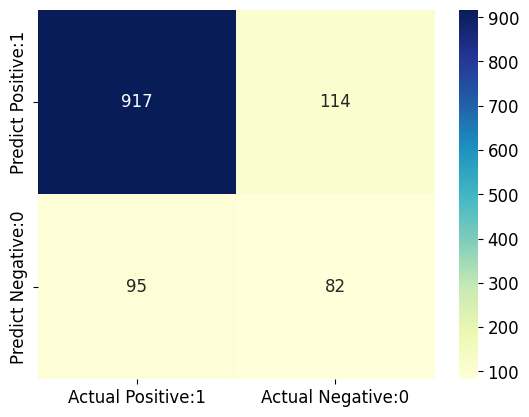

In [316]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **16. Classification metrices** <a class="anchor" id="16"></a>

[Table of Contents](#0.1)

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [317]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Alive       0.91      0.89      0.90      1031
        Dead       0.42      0.46      0.44       177

    accuracy                           0.83      1208
   macro avg       0.66      0.68      0.67      1208
weighted avg       0.83      0.83      0.83      1208



### Classification accuracy

In [318]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [319]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8270


### Classification error

In [320]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1730


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP)`.



In [321]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.8894


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN)`.



In [322]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9061


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [323]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9061


### False Positive Rate

In [324]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.5816


### Specificity

In [325]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.4184


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.




### Support


**Support** is the actual number of occurrences of the class in our dataset.

# **17. Calculate class probabilities** <a class="anchor" id="17"></a>

[Table of Contents](#0.1)

In [326]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[9.79898676e-01, 2.01013239e-02],
       [8.74149462e-01, 1.25850538e-01],
       [9.79892925e-01, 2.01070751e-02],
       [9.21121085e-01, 7.88789153e-02],
       [9.94815822e-01, 5.18417770e-03],
       [1.86690690e-01, 8.13309310e-01],
       [9.99305115e-01, 6.94884546e-04],
       [9.99914336e-01, 8.56640758e-05],
       [9.90825545e-01, 9.17445513e-03],
       [9.99332002e-01, 6.67997694e-04]])

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - `Dead` and `Alive`.

    - Class 0 => Dead - The class where someone will die if they get breast cancer.    
    
    - Class 1 => Alive  - The class in which a person will live if they have breast cancer. 
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 0 => Dead - probability of dead if probability < 0.5.    
    
    - Class 1 => alive - probability of alive if probability > 0.5.    
    


In [327]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Death', 'Prob of - Alive'])

y_pred_prob_df

,Prob of - Death,Prob of - Alive
0,0.979899,0.020101
1,0.874149,0.125851
2,0.979893,0.020107
3,0.921121,0.078879
4,0.994816,0.005184
5,0.186691,0.813309
6,0.999305,0.000695
7,0.999914,0.000086
8,0.990826,0.009174
9,0.999332,0.000668


In [328]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([2.01013239e-02, 1.25850538e-01, 2.01070751e-02, 7.88789153e-02,
       5.18417770e-03, 8.13309310e-01, 6.94884546e-04, 8.56640758e-05,
       9.17445513e-03, 6.67997694e-04])

In [329]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

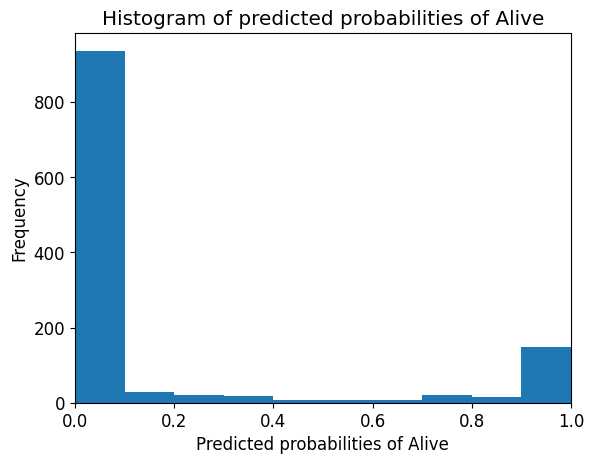

In [330]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Alive')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Alive')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 900 observations with probability between 0.0 and 0.1 whose dead.


- There are relatively small number of observations with probability > 0.5.

- Majority of observations predcit that the salaries will be dead.

# **18. ROC - AUC** <a class="anchor" id="18"></a>

[Table of Contents](#0.1)



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN)`.




**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN)`.



In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).



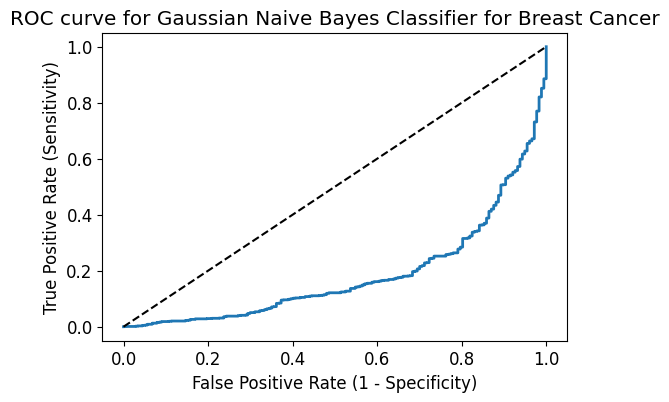

In [331]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Alive')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Breast Cancer')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [332]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8152


### Interpretation


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [333]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7969


# **19. k-Fold Cross Validation** <a class="anchor" id="19"></a>

[Table of Contents](#0.1)

In [334]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.74468085 0.80141844 0.80496454 0.84042553 0.80141844 0.83333333
 0.78647687 0.80071174 0.82562278 0.83274021]


We can summarize the cross-validation accuracy by calculating its mean.

In [335]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8072


### Interpretation


- Using the mean cross-validation, we can conclude that we expect the model to be around 80.72% accurate on average.

- If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 84% accuracy to 74% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

- Our original model accuracy is 0.8072, but the mean cross-validation accuracy is 0.8072. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

# **20. Results and conclusion** <a class="anchor" id="20"></a>

[Table of Contents](#0.1)


1.	In this project, I created a Gaussian Naïve Bayes Classifier model to predict whether someone will die or not if they have breast cancer. The model produces excellent performance as indicated by a model accuracy of 0.8072.
2.	The training-set accuracy score is 0.8075 while the test-set accuracy to be 0.8270. These two values are quite comparable. So, there is no sign of overfitting.
3.	I have compared the model accuracy score which is 0.8083 with null accuracy score which is 0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.
4.	The ROC AUC of our model is close to 1. So, we can conclude that our classifier works very well in predicting whether someone will die if they get breast cancer.
5.	Using the mean cross-validation, we can conclude that we expect the model to be around 80.72% accurate on average.
6.	If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 84% accuracy to 74% accuracy. So, we can conclude that the model is independent of the particular folds used for training.
7.	Our original model accuracy is 0.8072, but the mean cross-validation accuracy is 0.8072. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

[Go to Top](#0)